<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Lewandowski/Klasyfikacja%20binarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Całkowita liczba przypadków: 569
Liczba przypadków złośliwego raka: 357


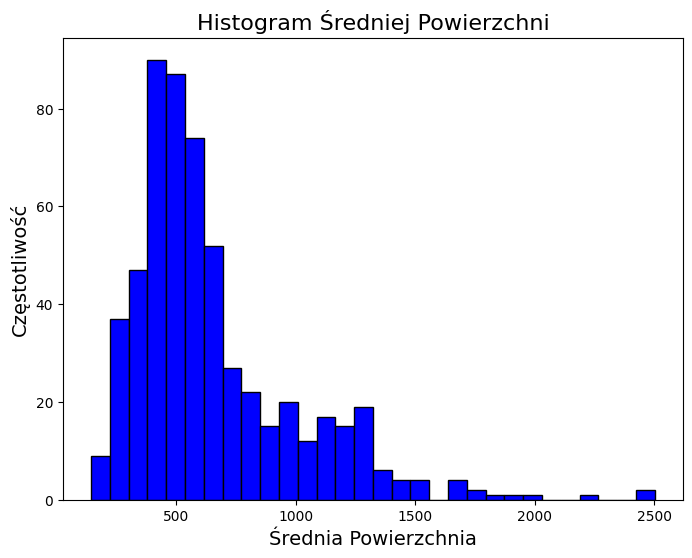

In [39]:
import sklearn.model_selection as ms
import sklearn.preprocessing as pp
import sklearn.linear_model as lm
import sklearn.neighbors as nb
import sklearn.metrics as mt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataset = load_breast_cancer()
y = dataset.target
X = dataset.data


# Całkowita liczba przypadków
total_cases = len(y)
print("Całkowita liczba przypadków:", total_cases)

# Liczba przypadków złośliwego raka
num_malignant = np.sum(y)
print("Liczba przypadków złośliwego raka:", num_malignant)

# Histogram średniej
mean_area = X[:, np.where(dataset.feature_names == 'mean area')[0][0]]
plt.figure(figsize=(8, 6))
plt.hist(mean_area, bins=30, color='blue', edgecolor='black')
plt.xlabel('Średnia Powierzchnia', fontsize=14)
plt.ylabel('Częstotliwość', fontsize=14)
plt.title('Histogram Średniej Powierzchni', fontsize=16)
plt.show()

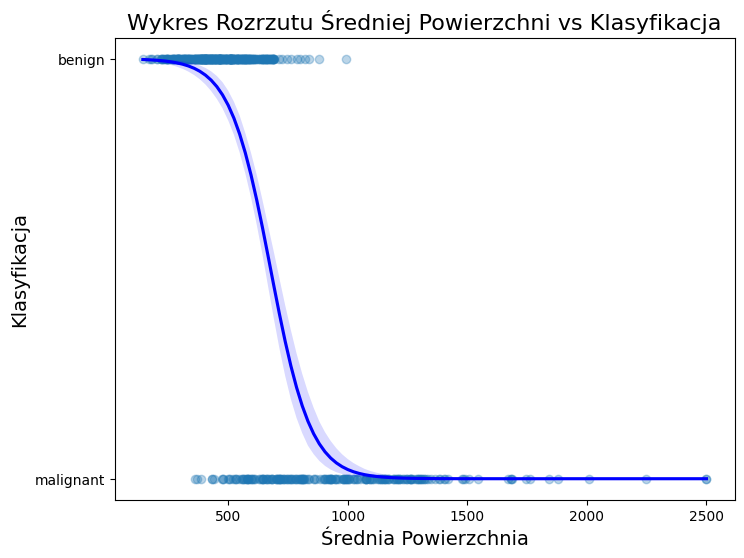

In [40]:
# Wykres rozrzutu średniej
plt.figure(figsize=(8, 6))
sns.regplot(x=mean_area, y=y, logistic=True, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.xlabel('Średnia Powierzchnia', fontsize=14)
plt.ylabel('Klasyfikacja', fontsize=14)
plt.title('Wykres Rozrzutu Średniej Powierzchni vs Klasyfikacja', fontsize=16)
plt.yticks([0, 1], dataset.target_names)
plt.show()

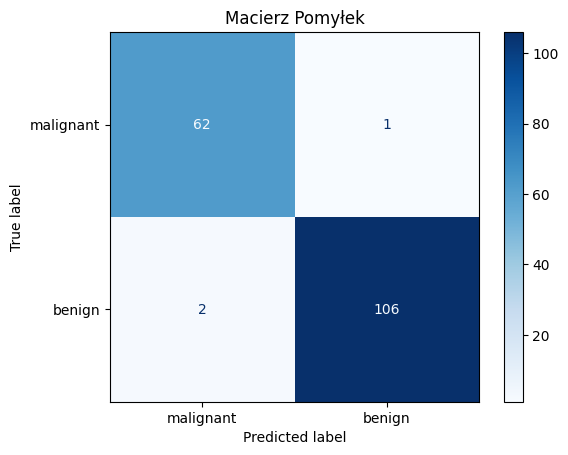

In [41]:
scaler = pp.StandardScaler()
X_scaled = scaler.fit_transform(X)


# Zbiór danych na testowy i uczący
X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Model regresji logistycznej
model = lm.LogisticRegression()
model.fit(X_train, y_train)

# Model K-sąsiadów
knn_model = nb.KNeighborsClassifier(n_neighbors=3)
knn_model = nb.KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Klasy dla zbioru testowego
y_pred = model.predict(X_test)

# ### Uwaga: Ocena modelu ###

# Macierz pomyłek - calculate
cm = mt.confusion_matrix(y_test, y_pred)

# Macierz pomyłek - display
display = mt.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)
display.plot(cmap=plt.cm.Blues)
plt.title('Macierz Pomyłek')
plt.show()

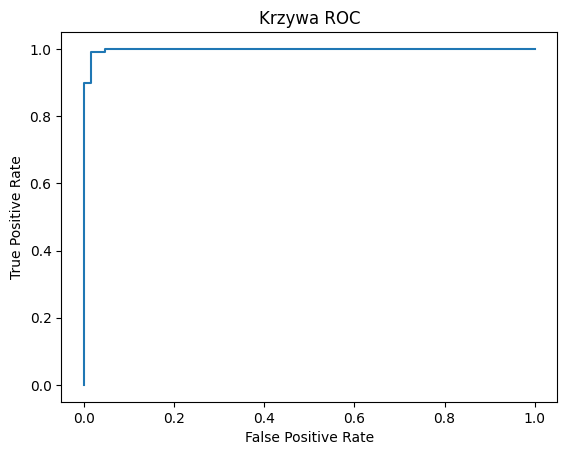

In [42]:
# Krzywa ROC - calculate
fpr, tpr, thresholds = mt.roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Krzywa ROC - display
roc_display = mt.RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title('Krzywa ROC')
plt.show()

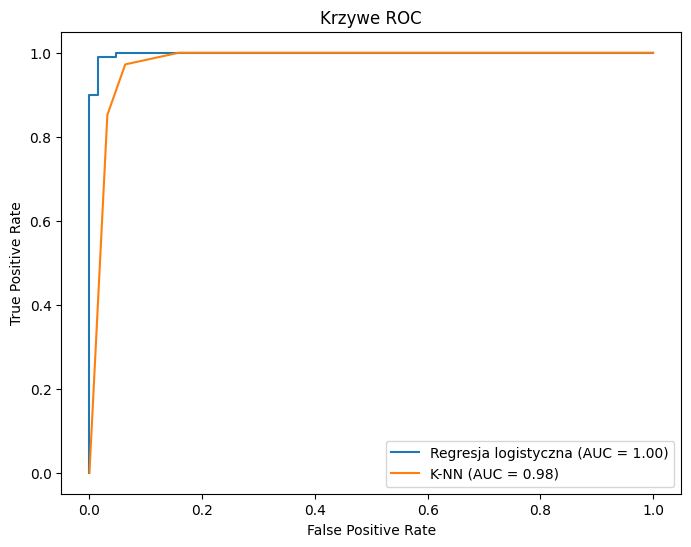

In [43]:
# Porównanie ROC i K-sąsiadów
lrprobs = model.predict_proba(X_test)[:, 1]
knnprobs = knn_model.predict_proba(X_test)[:, 1]

lrfpr, lrtpr, _ = mt.roc_curve(y_test, lrprobs)
lrauc = mt.auc(lrfpr, lrtpr)

knnfpr, knntpr, _ = mt.roc_curve(y_test, knnprobs)
knnauc = mt.auc(knnfpr, knntpr)

plt.figure(figsize=(8, 6))
plt.plot(lrfpr, lrtpr, label=f'Regresja logistyczna (AUC = {lrauc:.2f})')
plt.plot(knnfpr, knntpr, label=f'K-NN (AUC = {knnauc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC')
plt.legend()
plt.show()